In [1]:
import nltk
import pandas as pd
import numpy as np

In [2]:
rawtweets = pd.read_csv('tweets-dataset.csv',encoding="utf-8")

In [3]:
type(rawtweets)

pandas.core.frame.DataFrame

In [4]:
rawtweets.shape

(24521, 1)

In [5]:
rawtweets.head(5)

,Sentence
0,"@BubblyDentist @MeetUunngLee nahi nahi, mere s..."
1,going to the grammys first entertainment law b...
2,bohot hi badiya ji aap sunao?
3,Parvez Musharraf is Digvijay Singh of Pakistan...
4,guddu ko bass john cena k sticker ki padii hai...


In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/rauswarn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
#tokenizing words using nltk
tokens = []

for i in range(len(rawtweets)):
    for each in nltk.word_tokenize(rawtweets.iloc[i][0]):
        tokens.append(each)

In [8]:
len(tokens)

396826

In [9]:
unique_tokens = list(set(tokens))

In [10]:
len(unique_tokens)

49544

In [11]:
#before removing special characters, stop words
ttr = (len(unique_tokens)* 100) / len(tokens)
print(ttr)

12


In [12]:
#removing special characters
tokens_alpha = [each for each in tokens if each.isalpha()]
print(len(tokens_alpha))

297789


In [13]:
#before removing special characters
ttr = (len(unique_tokens)* 100) / len(tokens_alpha)
print(ttr)

16


In [43]:
# Calculate frequency distribution
fdist = nltk.FreqDist(tokens)

len(fdist)
# Output top 50 words
# for word, frequency in fdist.most_common(50):
#     print(u'{};{}'.format(word, frequency))

49544

In [93]:
import matplotlib.pyplot as pt

#hai;9180;3


# pt.plot(1,2,3)

In [16]:
len(tokens)

396826

In [45]:
rank = list(range(1, len(fdist)))
freqrank = zip(fdist.most_common(len(fdist)), rank)

In [240]:
#top 10 ranked words
freqrank[1:10]

[((u'@', 14396), 2),
 ((u'hai', 9180), 3),
 ((u':', 7516), 4),
 ((u'#', 7444), 5),
 ((u',', 7099), 6),
 ((u'?', 4895), 7),
 ((u'!', 4260), 8),
 ((u'to', 4004), 9),
 ((u'ke', 3077), 10)]

In [238]:
#lowest 10 ranked words
freqrank[-10:-1]

[((u'Gudgaanva', 1), 49534),
 ((u'Bhausadike', 1), 49535),
 ((u'withstood', 1), 49536),
 ((u'lagye', 1), 49537),
 ((u'shera', 1), 49538),
 ((u'Modi_G', 1), 49539),
 ((u'shero', 1), 49540),
 ((u'wednesdaywisdom', 1), 49541),
 ((u'mastakon', 1), 49542)]

In [ ]:
 ((u'to', 4004), 9),
 ((u'hi', 1728), 22),
 ((u'log', 415), 95),
 ((u'may', 255), 162),
 ((u'out', 251), 168),
 ((u'hone', 128), 312),
 ((u'tera', 113), 356),
 ((u'tab', 96), 430),
 ((u'season', 48), 864),


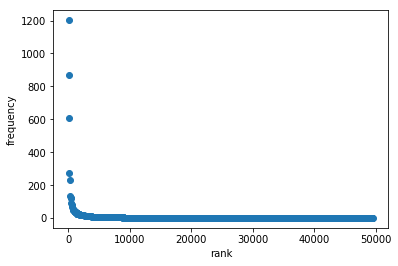

In [135]:
#Frequency vs Rank plot: Zipf's law
#The plot is a constant except first few instances
import random

rank_frequency_dict = {}

for i in range(1000):
    index = (int)(random.uniform(1,len(fdist)))
    rank_frequency_dict[freqrank[index][1]] = freqrank[index][0][1]

pt.xlabel('rank')
pt.ylabel('frequency')
pt.scatter(rank_frequency_dict.keys(),rank_frequency_dict.values())

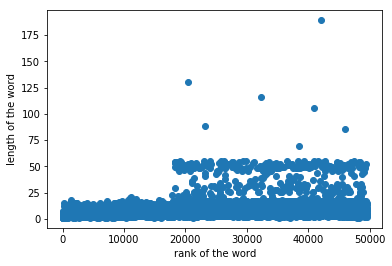

In [237]:
#Zipf's law for length: since the corpus is not large enough, zips's law is not visiable consistently

import random

rank_length_dict = {}

for i in range(10000):
    index = (int)(random.uniform(1,len(fdist)))
    rank_length_dict[freqrank[index][1]] = len(freqrank[index][0][0])

pt.xlabel('rank of the word')
pt.ylabel('length of the word')
pt.scatter(rank_length_dict.keys(), rank_length_dict.values())

In [160]:
from nltk.corpus import wordnet 

In [162]:
len(wordnet.synsets("good"))

27

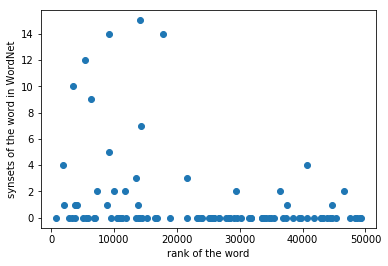

In [171]:
#Zipf's law for meaning: since the corpus is not large enough, zips's law is not visiable consistently

import random

rank_meaning_dict = {}

for i in range(100):
    index = (int)(random.uniform(1,len(fdist)))
    rank_meaning_dict[freqrank[index][1]] = len(wordnet.synsets(freqrank[index][0][0]))

pt.xlabel('rank of the word')
pt.ylabel('synsets of the word in WordNet')
pt.scatter(rank_meaning_dict.keys(), rank_meaning_dict.values())

In [207]:
#Heaps' Law
#tokenizing words using nltk
vocab_var = dict()

for j in range(1000, 20000, 500):
    tokens = []
    for i in range(j):
        for each in nltk.word_tokenize(rawtweets.iloc[i][0]):
            tokens.append(each)
    vocab_var[j] = len(list(set(tokens)))

{16000: 37624, 10500: 28368, 5000: 17125, 19500: 42896, 15500: 36830, 10000: 27438, 4500: 15937, 15000: 36036, 18500: 41495, 9500: 26490, 4000: 14712, 14500: 35197, 9000: 25532, 17500: 39952, 3500: 13426, 14000: 34371, 8500: 24562, 3000: 12109, 13500: 33572, 8000: 23557, 2500: 10738, 13000: 32772, 7500: 22590, 2000: 9252, 19000: 42221, 12500: 31884, 7000: 21469, 1500: 7489, 12000: 31052, 18000: 40745, 6500: 20424, 1000: 5493, 11500: 30158, 6000: 19339, 17000: 39181, 16500: 38434, 11000: 29333, 5500: 18257}


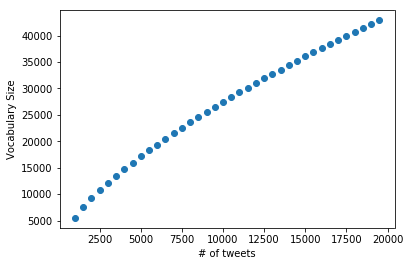

In [234]:
print(vocab_var)

pt.xlabel('# of tweets')
pt.ylabel("Vocabulary Size")
pt.scatter(vocab_var.keys(), vocab_var.values())